### The life of Hendrik Prins


![VOC Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/VOC.svg/180px-VOC.svg.png)


The Vereenigde Oostindische (VOC) <a href="https://www.visualcapitalist.com/most-valuable-companies-all-time/" target="_blank">was one of the largest employers in the 1700-1800s.</a> Naturally, a sizable portion of the Dutch Republics' population was employed by the VOC. This phenomenon does not only sparks the interest of historians but also of other enthusiasts, especially if a forefather was known to be employed by the VOC. We have such a case with a personal relation of mine, the Prins family. By their research, they know that their forefather was named Hendrik Prins, and he had his origins in Delft. Interestingly enough, they still have the VOC emblem of Hendrik. 

In this short data story, we will look into the life of Hendrik Prins. We start by just knowing his name and birthplace and use the VOC knowledge graph to explore related voyages, goods, and events during the life of Hendrik Prins. 

*Data story by Stijn Schouten, written on 26-06-2021*
*Composed using JupyterLab, using the SPARQLWrapper to access the GraphDB endpoint.*


In [27]:
#!pip install SPARQLWrapper
#!pip install pandas
#!pip install tabulate

from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, JSONLD, CSV, TSV, N3, RDF, RDFXML, TURTLE
import pandas as pd
import itertools
from IPython.display import display, HTML
from matplotlib import pyplot
from datetime import date
import numpy as np

In [28]:
sparql = SPARQLWrapper("http://localhost:7200/repositories/metaphactory")
sparql.setReturnFormat(JSON)
prefixes = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX ex: <http://example.com/>
PREFIX cdfh: <http://dataforhistory.org/maritime-history-ongoing/class/>
PREFIX pdfh: <http://dataforhistory.org/maritime-history-ongoing/property/>
PREFIX dfhc: <https://dataforhistory.org/ontology/maritimehistorycontinued/>
PREFIX histsocP: <http://dataforhistory.org/histsocial-ongoing/property/>
PREFIX histsocC: <http://dataforhistory.org/histsocial-ongoing/class/>
PREFIX histdmiC: <http://dataforhistory.org/histdmi-generic-ongoing/class/>
PREFIX histdmiP: <http://dataforhistory.org/histdmi-generic-ongoing/property/>
"""

#### Finding Hendrik Prins

In the query below, we select all the persons who originated from Delft NL and filter out the Hendrik Prins name.

In [31]:
sparql.setQuery(prefixes+"""
SELECT ?person ?name ?from
WHERE
{
?person histsocP:P24 <http://example.com/place/vocUniquePlaceID_1192>.
<http://example.com/place/vocUniquePlaceID_1192> crm:P1 ?from.
?person dfhc:P8 ?name.
filter contains(?name,"Hendrik Prins")
} """)

In [32]:
qry = sparql.query().convert()
df = pd.DataFrame(qry['results']['bindings'])
df = df.applymap(lambda x: x['value'])
dfn = df.replace("http://example.com/","",regex=True)
display(dfn)

,person,name,from
0,person/1042325,Hendrik Prins,appellation/Delft_NL
1,person/1087798,Hendrik Prins,appellation/Delft_NL


We find that there are two records with the name Hendrik Prins who originated from Delft. We can take a closer into these persons by retrieving more information.

In [33]:
sparql.setQuery(prefixes +"""
SELECT ?person ?participation ?timespan ?reasonend
WHERE
{
    ?person histsocP:P24 <http://example.com/place/vocUniquePlaceID_1192>.
    ?person dfhc:P8 ?name.
    ?participation histsocP:P10 ?person.
    ?participation crm:P4 ?timespan.
    ?reasonend crm:P115 ?participation.
    filter contains(?name,"Hendrik Prins")
}""")

In [34]:
qry = sparql.query().convert()
df = pd.DataFrame(qry['results']['bindings'])
df = df.applymap(lambda x: x['value'])
dfn = df.replace("http://example.com/","",regex=True)

display(dfn)

,participation,person,timespan,reasonend
0,participation/94248-1042325,person/1042325,appellation/1741-03-29_1743-07-20,endofexistence/Repatriated
1,participation/94327-1042325,person/1042325,appellation/1743-11-27_1745-08-24,endofexistence/Repatriated
2,participation/94412-1042325,person/1042325,appellation/1745-11-11_1746-06-10,endofexistence/Last_record
3,participation/94678-1087798,person/1087798,appellation/1754-03-06_1758-08-19,endofexistence/Deceased


There are four participations linked to the two records. The Hendrik Prins with identifier 1042325 starts his career in 1741 and continues enlisting three times with his last entry in 1746. The Hendrik Prins with identifier 1087798 starts his career in 1754, and it is a short-lived career as his contract ends due to him perishing on his first voyage. 

There is a possibility that the first Hendrik Prins could be the same as the second. There is a gap of 8 years between the last enlisting and the enlisting of the second Hendrik Prins. This gap could exist due to missing records or other reasons. The reason for the ending of the first Hendrik Prins does not give a final answer. The last record category is because of reasons unknown. 

The three participations of the first Hendrik Prins entry involved the same route. (screenshot) Like many others in that time, the route started from the Netherlands (Goeree) and sailed to Batavia (now Jakarta) via the Cape of Good hope. The precise route is unknown, but looking at the timeframe, there is a good chance the faster Brouwer route is used. The route is illustrated.

![route](https://upload.wikimedia.org/wikipedia/commons/e/ed/The-Brouwer-Route.jpg)

#### Data analysis

We can compare the voyages of Hendrik Prins with other similar voyages which have the same starting and ending place. If the departing and arrival dates are known, we can conclude if the voyage of Hendrik Prins was, by comparison, quicker.

In [35]:
sparql.setQuery(prefixes +"""
SELECT ?voyage ?leg ?starttime ?endtime
  WHERE {
  ?voyage pdfh:P1 <http://example.com/place/vocUniquePlaceID_1787>.
  ?voyage pdfh:P2 <http://example.com/place/vocUniquePlaceID_2357>.
  ?leg histdmiP:P5 ?voyage.
  ?start crm:P115 ?leg;
         crm:P4 ?starttime.
  ?end crm:P116 ?leg;
       crm:P4 ?endtime.
}
  """)

In [36]:
qry = sparql.query().convert()
df = pd.DataFrame(qry['results']['bindings'])
df = df.applymap(lambda x: x['value'])
dfn = df.replace("http://example.com/appellation/","",regex=True)

In [37]:
firstlegs = []
secondlegs = []
for i in dfn.itertuples():
    if int(i[4][-1]) == 1:
        firstlegs.append({'starttime':date(*map(int, i[2].split('-'))), 'endtime':date(*map(int, i[1].split('-'))), 'voyage':i[3]})
    else:
        secondlegs.append({'starttime':date(*map(int, i[2].split('-'))), 'endtime':date(*map(int, i[1].split('-'))), 'voyage':i[3]})
for entry in firstlegs:
    delta = entry['starttime'] - entry['endtime']
    entry['delta'] = delta.days
fldf = pd.DataFrame(firstlegs)
print(fldf[fldf.delta > 0].describe())

for entry in secondlegs:
    delta = entry['starttime'] - entry['endtime']
    entry['delta'] = delta.days
sldf = pd.DataFrame(secondlegs)
print(sldf[sldf.delta > 0].describe())


            delta
count  542.000000
mean   148.994465
std    102.697238
min     71.000000
25%    110.000000
50%    127.000000
75%    152.000000
max    868.000000
            delta
count  481.000000
mean    81.446985
std     22.556822
min     30.000000
25%     67.000000
50%     79.000000
75%     90.000000
max    287.000000


There are 542 first legs, from Goeree NL to the Cape of Good Hope SA registered. The mean delta (days traveled) is 148. There are exciting outliers, such as the max value of 868. Meaning a ship took around three years to complete the leg. From the Cape, 481 legs have registered that travel to Jakarta ID. The second leg is overall much shorter, with a mean of 81 days traveled. The outliers are much more confined as well, with a maximum value of 287.

Hendrik Prins sailed three times on the voyages 94248, 94327, and 94412 in the outwards direction, from the Republic to the Dutch Indies. We can compare the delta (days traveled) with the other similar voyages in a boxplot. Note that the second leg misses an entry due to a missing arrival date (voyage 94327).

The voyages of Hendrik Prins were, overall, quicker than the mean. 

In [38]:
sparql.setQuery(prefixes +"""
SELECT *
  WHERE {
  ?participation histsocP:P10 <http://example.com/person/1042325>.
  ?participation histsocP:P11 ?voyage.
  ?voyage pdfh:P1 <http://example.com/place/vocUniquePlaceID_1787>.
  ?voyage pdfh:P2 <http://example.com/place/vocUniquePlaceID_2357>.
}
  """)
qry = sparql.query().convert()
df = pd.DataFrame(qry['results']['bindings'])
df = df.applymap(lambda x: x['value'])
dfn = df.replace("http://example.com/","",regex=True)
display(dfn)

,participation,voyage
0,participation/94248-1042325,voyage/94248
1,participation/94327-1042325,voyage/94327
2,participation/94412-1042325,voyage/94412


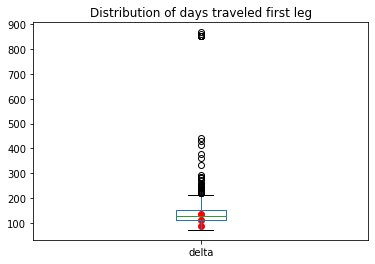

In [12]:
plot = fldf[fldf.delta > 0].plot(kind='box', title="Distribution of days traveled first leg")
plot.scatter([1,1,1],[87,137,109], color='r')

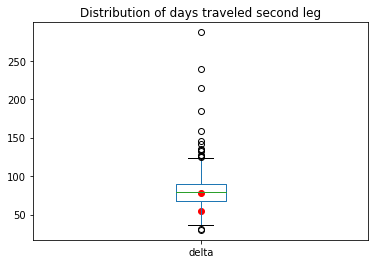

In [13]:
plot = sldf[sldf.delta > 0].plot(kind='box', title= "Distribution of days traveled second leg")
plot.scatter([1,1],[55,78], color='r')

#### Qualitative analysis

In the previous section, the artifact is used in data analysis. However, the artifact is also widely deployable for qualitative research. For example, the property P1:Voy Particulars illustrates the highlights of a voyage in a couple of sentences. We can retrieve the related particulars of the Hendrik Prins voyages to discover unusual or interesting facts.

In [39]:
sparql.setQuery(prefixes +"""
SELECT ?voyage ?particular
  WHERE {
  ?participation histsocP:P10 <http://example.com/person/1042325>.
  ?participation histsocP:P11 ?voyage.
  ?voyage a cdfh:C1.
  ?voyage dfhc:P1 ?particular
}
  """)

In [40]:
qry = sparql.query().convert()
df = pd.DataFrame(qry['results']['bindings'])
df = df.applymap(lambda x: x['value'])
dfn = df.replace("http://example.com/","",regex=True)
pd.set_option('display.max_colwidth', None)
display(dfn)

,particular,voyage
0,Pieter Jellesz. was schout-by-nacht of the return fleet. The 117 men aboard the TOLSDUIN included 90 seafarers.,voyage/98050
1,After an accident on a voyage to Ambon the DELFLAND was laid up on 12-07-1746.,voyage/94248
2,The TOLSDUIN called at Duins (17-12-1743 till 06-01-1744) where 11 seafarers and 4 soldiers were pressed by the English. During the voyage one soldier became seafarer.,voyage/94327
3,"At the Cape a stowaway, found on the TOLSDUIN, embarked on the EENDRACHT, which set out to Batavia on 22-03-1745 (3309).",voyage/98101


Hendrik Prins sailed under the command on one of the schout-by-nacht' of the Replubic: Pieter Jelleszoon. Furthermore, they were pressed by the English at one point; it must have been thrilling. Finally, the crew of Prins found a stowaway when docked at the cape. Overall, an interesting life on board a VOC ship.

The Wind in our sails project does not only cover the moments of ships and their participants. It also features a connection with the bookkeeper's logs. Information about cargo shipped on the voyages is stored. With a query, we can retrieve the goods that were shipped on the voyages of Hendrik Prins.

In [41]:
sparql.setQuery(prefixes +"""
SELECT DISTINCT ?voyage ?typename ?direction
  WHERE {
  ?participation histsocP:P10 <http://example.com/person/1042325>.
  ?participation histsocP:P11 ?voyage.
  OPTIONAL{?voyage dfhc:P2 ?direction}
  ?voyage a cdfh:C1.
  ?voyage dfhc:P10 ?good.
  ?good crm:P2 ?type.
  ?type crm:P1 ?typename.
}
  """)

In [42]:
qry = sparql.query().convert()
df = pd.DataFrame(qry['results']['bindings'])
df = df.applymap(lambda x: x['value'])
dfn = df.replace("http://example.com/","",regex=True)
pd.set_option('display.max_colwidth', None)
dfn.to_csv('test.csv')
#dfn.to_latex('goods.tex',longtable=True)

In the table above, the goods shipped on the voyages of Hendrik Prins are listed. In the outward voyages, goods for trading were brought along, such as velvet or silver. On the return voyage, the goods shipped were more diverse. From nutmeg to salmiak, the spices and goods flowed rich.

#### Career and conclusion 

There is no guarantee that the second Hendrik Prins from Delft is the same person as the first one. Overall, between the third and fourth contract, there is a gap of over eight years. We might check two things if we want to determine if the two entries are the same person. First, we can check if the debt letters of the entries refer to the same person. Second, we might check the career path of the participants to determine if there is a logical connection.

In [43]:
sparql.setQuery(prefixes +"""
SELECT DISTINCT ?voyage ?typename ?direction
  WHERE {
?person histsocP:P24 <http://example.com/place/vocUniquePlaceID_1192>.
<http://example.com/place/vocUniquePlaceID_1192> crm:P1 ?from.
?person dfhc:P8 ?name.
  ?relation histsocP:P17 ?person.
filter contains(?name,"Hendrik Prins")
}
  """)

In [45]:
qry = sparql.query().convert()
df = pd.DataFrame(qry['results']['bindings'])
df = df.applymap(lambda x: x['value'])
dfn = df.replace("http://example.com/","",regex=True)
print(dfn)

Empty DataFrame
Columns: []
Index: []


Unfortunately, both entries do not have a debt letter relation. Thus that trail ends here. The other trail, one of the careers, we can still follow. In the query below, the rank performed during the voyages is displayed.

In [46]:
sparql.setQuery(prefixes +"""
SELECT ?person ?rank
  WHERE {
?person histsocP:P24 <http://example.com/place/vocUniquePlaceID_1192>.
<http://example.com/place/vocUniquePlaceID_1192> crm:P1 ?from.
?person dfhc:P8 ?name.
  ?participation histsocP:P10 ?person.
  ?participation histsocP:P12 ?rank.
filter contains(?name,"Hendrik Prins")
}
  """)

In [47]:
qry = sparql.query().convert()
df = pd.DataFrame(qry['results']['bindings'])
df = df.applymap(lambda x: x['value'])
dfn = df.replace("http://example.com/","",regex=True)
display(dfn)

,person,rank
0,person/1042325,rank/sailor
1,person/1042325,rank/ship_gunner
2,person/1087798,rank/senior_weapons_master


The rank trail does yield some knowledge. Hendrik Prins started as a sailor, the base rank on a ship. He then moved to a more experienced role, the ship gunner. The ship gunner is still a sailor but also bears the responsibility of firing the canon in times of turmoil. The second entry of Hendrik Prins bears the role of senior weapons master (or Opperkonstabel in Dutch.) The weapons master is responsible for the weapons on board the ship. A rank that is not easily reached without experience. Thus, there is a good chance, due to missing records, Hendrik Prins had a career from sailor to the senior weapons master in his later years. 

The life of Hendrik Prins came to an end during voyage 94678. There is no reason stated, but the life on board of a ship could be harsh. During this particular voyage, seven other seafarers, six soldiers, and one craftsman perished. The table can be viewed below.